# Import des modules

In [8]:
#imports de modules
import pandas as pd
import numpy as np
import sklearn 
import sklearn.ensemble
import sklearn.metrics
import shap

# Lecture des données

In [48]:
#Lecture data csv 
db = pd.read_csv('../1_and_0/1.csv')
for i in range(2,17):
    db1=pd.read_csv('../1_and_0/'+str(i)+'.csv')
    db = pd.concat([db,db1])
#preprocess step
db.replace([np.inf, -np.inf], 1000, inplace=True)
db.fillna(db.mean(axis=0))
db.dropna(how='any', inplace=True)
db.columns
db.head()

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


,interval_index,interval_start_time,mean_nni,sdnn,sdsd,nni_50,pnni_50,nni_20,pnni_20,rmssd,...,csi,cvi,Modified_csi,sampen,sd1,sd2,ratio_sd2_sd1,timestamp,filename,label
152,153.0,153000.0,954.285714,314.244976,183.378176,2.0,33.333333,2.0,33.333333,227.514102,...,2.526348,6.010220,4063.025323,0.589963,159.148774,402.065138,2.526348,2003-07-16 12:18:19.476,output/feats-v0_6/feats_00000258_s001_t000.csv,1
153,154.0,154000.0,935.000000,296.003861,179.063323,2.0,28.571429,3.0,42.857143,210.902821,...,2.491764,6.012272,3989.295195,0.510826,160.628404,400.248086,2.491764,2003-07-16 12:18:20.476,output/feats-v0_6/feats_00000258_s001_t000.csv,1
154,155.0,155000.0,786.750000,10.194536,11.801072,0.0,0.000000,1.0,14.285714,12.142017,...,2.513220,6.011152,4035.729339,0.491594,159.735325,401.450040,2.513220,2003-07-16 12:18:21.476,output/feats-v0_6/feats_00000258_s001_t000.csv,1
155,156.0,156000.0,775.750000,22.384625,20.335954,0.0,0.000000,3.0,42.857143,22.296701,...,3.028551,5.914937,4778.820727,0.549504,130.253940,394.480743,3.028551,2003-07-16 12:18:22.476,output/feats-v0_6/feats_00000258_s001_t000.csv,1
158,159.0,159000.0,759.333333,28.635642,24.939928,0.0,0.000000,6.0,75.000000,26.514147,...,2.822968,5.963401,4547.359774,0.392307,142.655175,402.710940,2.822968,2003-07-16 12:18:25.476,output/feats-v0_6/feats_00000258_s001_t000.csv,1


In [49]:
#Split du dataset entre train et test sets
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(db, test_size=0.2, random_state =25)

#élimination des features n'intervenant pas dans la ^rédiction
X_train = train_data.drop('label', axis=1).drop('timestamp', axis=1).drop('interval_start_time', axis=1)
X_train = X_train.drop('filename', axis=1).drop('interval_index', axis=1)
#séparation de la colonne contenant les label
y_train = train_data['label']
X_test = test_data.drop('label', axis=1).drop('timestamp', axis=1).drop('interval_start_time', axis=1)
X_test = X_test.drop('filename', axis=1).drop('interval_index', axis=1)
y_test = test_data['label']

#print(X_train.isnull().values.any())
#print(y_train.isnull().values.any())
#result = X_train.dtypes
#print(result)

# Entraînement d'un random forest

In [50]:
#train et fit la prédiction
rf = sklearn.ensemble.RandomForestClassifier(n_estimators=50)
rf.fit(X_train.values, y_train.values)

pred = rf.predict(X_test.values)
sklearn.metrics.f1_score(y_test, pred, average='binary')

0.9565217391304348

# Explication avec SHAP

In [51]:
shap.initjs()
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

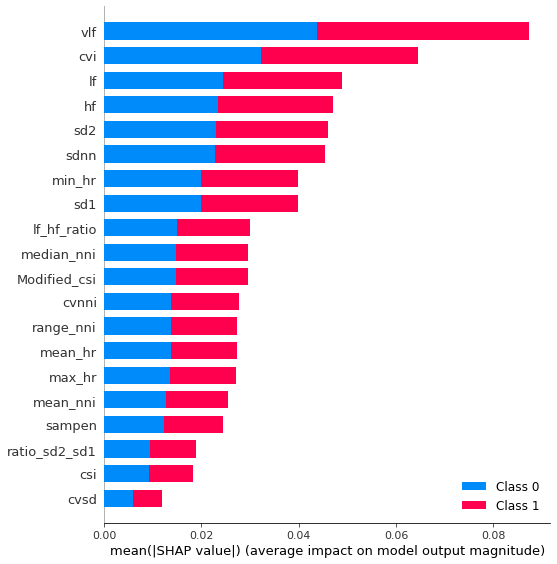

In [61]:
shap.summary_plot(shap_values, X_test.values, plot_type="bar",feature_names=X_test.columns)

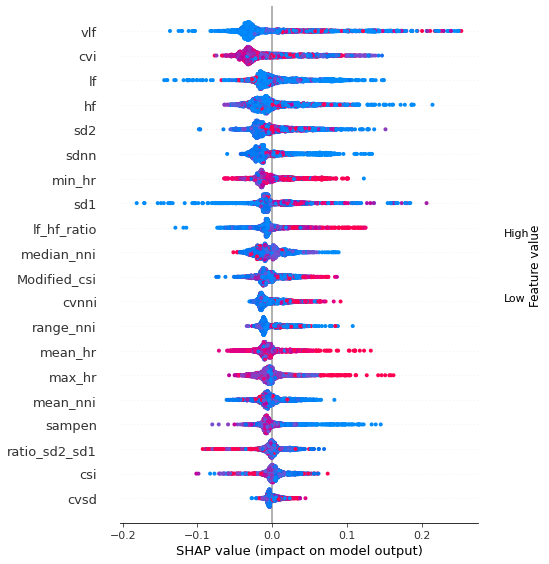

In [64]:
shap.summary_plot(shap_values[1], X_test.values,feature_names=X_test.columns)

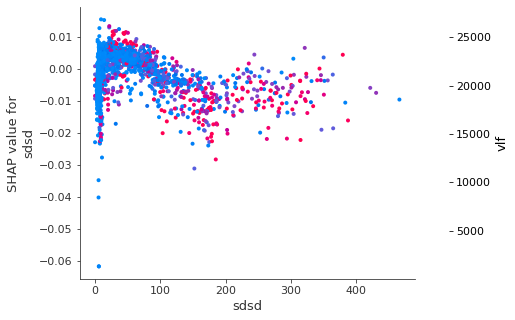

In [70]:
shap.dependence_plot(2, shap_values[0], X_test.values, feature_names=X_test.columns)

In [55]:
np.where(y_test==1)

(array([   7,    9,   15,   18,   20,   27,   29,   34,   36,   38,   40,
          45,   48,   52,   56,   67,   74,   75,   76,   77,   80,   85,
          93,  101,  104,  106,  111,  114,  115,  130,  131,  132,  133,
         134,  139,  140,  150,  153,  163,  166,  173,  179,  183,  188,
         192,  195,  197,  206,  207,  211,  213,  214,  215,  217,  225,
         227,  228,  229,  238,  239,  249,  250,  253,  257,  258,  270,
         273,  274,  277,  278,  290,  291,  294,  295,  298,  302,  304,
         305,  306,  310,  317,  318,  322,  326,  328,  329,  330,  332,
         340,  341,  343,  345,  346,  350,  351,  360,  363,  366,  371,
         373,  377,  379,  381,  383,  385,  386,  387,  390,  393,  396,
         397,  400,  402,  404,  413,  423,  424,  428,  431,  448,  450,
         451,  452,  455,  463,  464,  465,  470,  478,  489,  490,  493,
         497,  502,  504,  507,  512,  519,  522,  523,  525,  529,  532,
         534,  539,  541,  543,  549, 

In [56]:
i=0
shap.force_plot(explainer.expected_value[0], shap_values[0][i], X_test.values[i], feature_names = X_test.columns)

In [57]:
i=45
shap.force_plot(explainer.expected_value[0], shap_values[0][i], X_test.values[i], feature_names = X_test.columns)

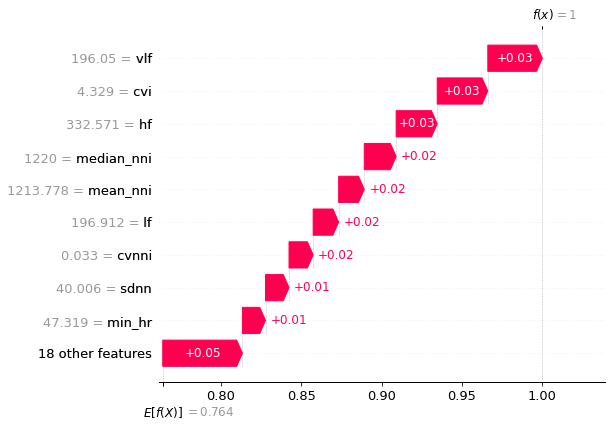

In [58]:
row = 8
shap.waterfall_plot(shap.Explanation(values=shap_values[0][row], 
                                              base_values=explainer.expected_value[0], data=X_test.iloc[row],  
                                         feature_names=X_test.columns.tolist()))